In [1]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [2]:
dataset = pd.read_csv('C:/Users/LENOVO/Documents/churn/churn_ds.csv')
dataset.head(10)

,customer_id,referred,number_ofreferral,tenure_month,offer,phone_service,avg_ldc,multiple_lines,internet_services,internet_type,avg_md,online_security,online_backup,dpp,pts,stream_tv,stream_movies,stream_music,unlimited_data,contract,paperless_bill,payment_method,mc,tc,trfd,tedc,tldc,total_revenue,gender,age,under_30,married,dependents,number_ofdependents,satisfaction_score,customer_status,churn_label,cltv
0,0002-ORFBO,Yes,2,9,None,Yes,42.39,No,Yes,Cable,16,No,Yes,No,Yes,Yes,No,No,Yes,One Year,Yes,Credit Card,65.60,593.30,0.00,0,381.51,974.81,Female,37,No,Yes,No,0,3,Stayed,No,2205
1,0003-MKNFE,No,0,9,None,Yes,10.69,Yes,Yes,Cable,10,No,No,No,No,No,Yes,Yes,No,Month-to-Month,No,Credit Card,59.90,542.40,38.33,10,96.21,610.28,Male,46,No,No,No,0,5,Stayed,No,5414
2,0004-TLHLJ,No,0,4,Offer E,Yes,33.65,No,Yes,Fiber,30,No,No,Yes,No,No,No,No,Yes,Month-to-Month,Yes,Bank Withdrawal,73.90,280.85,0.00,0,134.60,415.45,Male,50,No,No,No,0,1,Churned,Yes,4479
3,0011-IGKFF,Yes,1,13,Offer D,Yes,27.82,No,Yes,Fiber,4,No,Yes,Yes,No,Yes,Yes,No,Yes,Month-to-Month,Yes,Bank Withdrawal,98.00,1237.85,0.00,0,361.66,1599.51,Male,78,No,Yes,No,0,1,Churned,Yes,3714
4,0013-EXCHZ,Yes,3,3,None,Yes,7.38,No,Yes,Fiber,11,No,No,No,Yes,Yes,No,No,Yes,Month-to-Month,Yes,Credit Card,83.90,267.40,0.00,0,22.14,289.54,Female,75,No,Yes,No,0,1,Churned,Yes,3464
5,0013-MHZWF,No,0,9,Offer E,Yes,16.77,No,Yes,Cable,73,No,No,No,Yes,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Credit Card,69.40,571.45,0.00,0,150.93,722.38,Female,23,Yes,No,Yes,3,3,Stayed,No,5108
6,0013-SMEOE,Yes,1,71,Offer A,Yes,9.96,No,Yes,Fiber,14,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Bank Withdrawal,109.70,7904.25,0.00,0,707.16,8611.41,Female,67,No,Yes,No,0,3,Stayed,No,5011
7,0014-BMAQU,Yes,8,63,Offer B,Yes,12.96,Yes,Yes,Fiber,7,Yes,No,No,Yes,No,No,No,No,Two Year,Yes,Credit Card,84.65,5377.80,0.00,20,816.48,6214.28,Male,52,No,Yes,No,0,4,Stayed,No,4604
8,0015-UOCOJ,No,0,7,Offer E,Yes,10.53,No,Yes,DSL,21,Yes,No,No,No,No,No,No,Yes,Two Year,Yes,Bank Withdrawal,48.20,340.35,0.00,0,73.71,414.06,Female,68,No,No,No,0,3,Stayed,No,5525
9,0016-QLJIS,Yes,3,65,None,Yes,28.46,Yes,Yes,Cable,14,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Two Year,Yes,Credit Card,90.45,5957.90,0.00,0,1849.90,7807.80,Female,43,No,Yes,Yes,1,3,Stayed,No,5509


In [3]:
dataset.describe()

,number_ofreferral,tenure_month,avg_ldc,avg_md,mc,tc,trfd,tedc,tldc,total_revenue,age,number_ofdependents,satisfaction_score,cltv
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.951867,32.386767,22.958954,20.515405,64.761692,2280.381264,1.962182,6.860713,749.099262,3034.379056,46.509726,0.468692,3.244924,4400.295755
std,3.001199,24.542061,15.448113,20.418940,30.090047,2266.220462,7.902614,25.104978,846.660055,2865.204542,16.750352,0.962802,1.201657,1183.057152
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,21.360000,19.000000,0.000000,1.000000,2003.000000
25%,0.000000,9.000000,9.210000,3.000000,35.500000,400.150000,0.000000,0.000000,70.545000,605.610000,32.000000,0.000000,3.000000,3469.000000
50%,0.000000,29.000000,22.890000,17.000000,70.350000,1394.550000,0.000000,0.000000,401.440000,2108.640000,46.000000,0.000000,3.000000,4527.000000
75%,3.000000,55.000000,36.395000,27.000000,89.850000,3786.600000,0.000000,0.000000,1191.100000,4801.145000,60.000000,0.000000,4.000000,5380.500000
max,11.000000,72.000000,49.990000,85.000000,118.750000,8684.800000,49.790000,150.000000,3564.720000,11979.340000,80.000000,9.000000,5.000000,6500.000000


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          7043 non-null   object 
 1   referred             7043 non-null   object 
 2   number_ofreferral    7043 non-null   int64  
 3   tenure_month         7043 non-null   int64  
 4   offer                7043 non-null   object 
 5   phone_service        7043 non-null   object 
 6   avg_ldc              7043 non-null   float64
 7   multiple_lines       7043 non-null   object 
 8   internet_services    7043 non-null   object 
 9   internet_type        7043 non-null   object 
 10  avg_md               7043 non-null   int64  
 11  online_security      7043 non-null   object 
 12  online_backup        7043 non-null   object 
 13  dpp                  7043 non-null   object 
 14  pts                  7043 non-null   object 
 15  stream_tv            7043 non-null   o

In [5]:
dataset["churn_label"].value_counts()

No     5174
Yes    1869
Name: churn_label, dtype: int64

In [6]:
dataset["referred"].nunique()
dataset["referred"].unique()

array(['Yes', 'No'], dtype=object)

In [7]:
dataset["offer"].nunique()
dataset["offer"].unique()

array(['None', 'Offer E', 'Offer D', 'Offer A', 'Offer B', 'Offer C'],
      dtype=object)

In [8]:
#Create a label encoder object
le = LabelEncoder()
# Label Encoding will be used for columns with 2 or less unique 
le_count = 0
for col in dataset.columns[1:]:
    if dataset[col].dtype == 'object':
        if len(list(dataset[col].unique())) <= 2:
            le.fit(dataset[col])
            dataset[col] = le.transform(dataset[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

18 columns were label encoded.


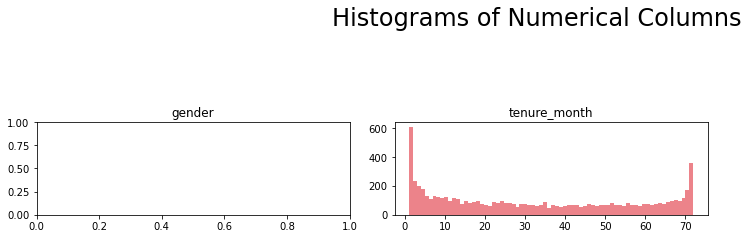

In [9]:
dataset2 = dataset[['gender','tenure_month']]
#Histogram:
    
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns\n',horizontalalignment="center",fontstyle = "normal", fontsize = 24, fontfamily = "sans-serif")
for i in range(dataset2.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(dataset2.columns.values[i])
vals = np.size(dataset2.iloc[:, i].unique())
if vals >= 100:
        vals = 100
    
plt.hist(dataset2.iloc[:, i], bins=vals, color = '#ec838a')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

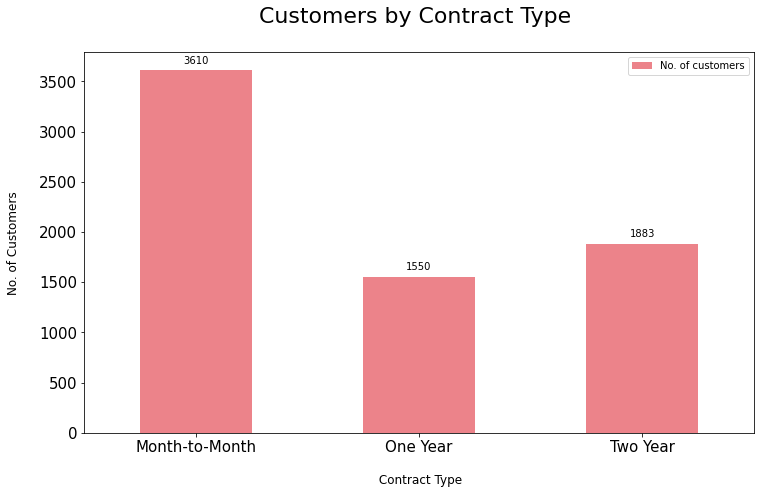

In [10]:
contract_split = dataset[[ "customer_id", "contract"]]
sectors = contract_split .groupby ("contract")
contract_split = pd.DataFrame(sectors["customer_id"].count())
contract_split.rename(columns={'customer_id':'No. of customers'}, inplace=True)
ax =  contract_split[["No. of customers"]].plot.bar(title = 'Customers by Contract Type',legend =True, table = False, 
grid = False,  subplots = False,figsize =(12, 7), color ='#ec838a', 
fontsize = 15, stacked=False)
plt.ylabel('No. of Customers\n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.xlabel('\n Contract Type',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "large", fontfamily = "sans-serif")
plt.title('Customers by Contract Type \n',
horizontalalignment="center",fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc='upper right', fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
x_labels = np.array(contract_split[["No. of customers"]])
def add_value_labels(ax, spacing=5):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        
        ax.annotate(
            label,                      
            (x_value, y_value),         
            xytext=(0, space),          
            textcoords="offset points", 
            ha='center',                
            va=va)  
        
add_value_labels(ax)

In [11]:
dataset.loc[dataset.churn_label=='No','Churn'] = 0 
dataset.loc[dataset.churn_label=='Yes','Churn'] = 1

In [12]:
dataset2 = dataset[['tenure_month', 'married', 'dependents', 'phone_service', 'avg_ldc', 'multiple_lines']]
correlations = dataset2.corrwith(dataset.Churn)
correlations = correlations[correlations!=1]
positive_correlations = correlations[
correlations >0].sort_values(ascending = False)
negative_correlations =correlations[
correlations<0].sort_values(ascending = False)
print('Most Positive Correlations: \n', positive_correlations)
print('\nMost Negative Correlations: \n', negative_correlations)

Most Positive Correlations: 
 Series([], dtype: float64)

Most Negative Correlations: 
 Series([], dtype: float64)


Text(0.5, 1.0, 'Correlation with Churn Rate \n')

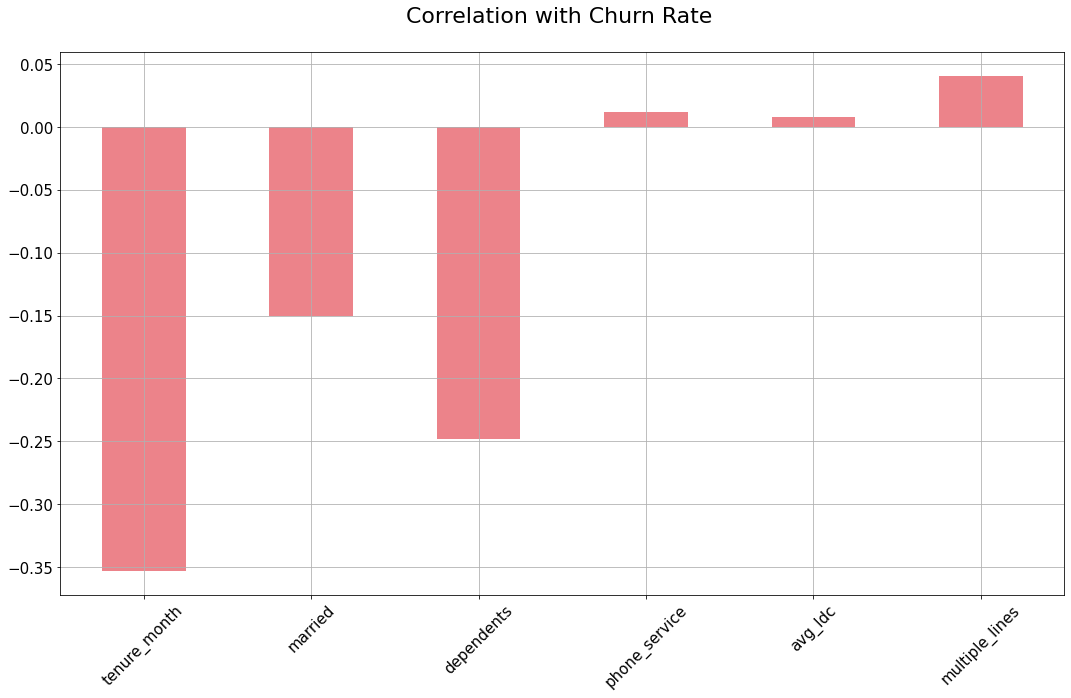

In [13]:
correlations = dataset2.corrwith(dataset.churn_label)
correlations = correlations[correlations!=1]
correlations.plot.bar(
        figsize = (18, 10), 
        fontsize = 15, 
        color = '#ec838a',
        rot = 45, grid = True)
plt.title('Correlation with Churn Rate \n',
horizontalalignment="center", fontstyle = "normal", 
fontsize = "22", fontfamily = "sans-serif")

<AxesSubplot:>

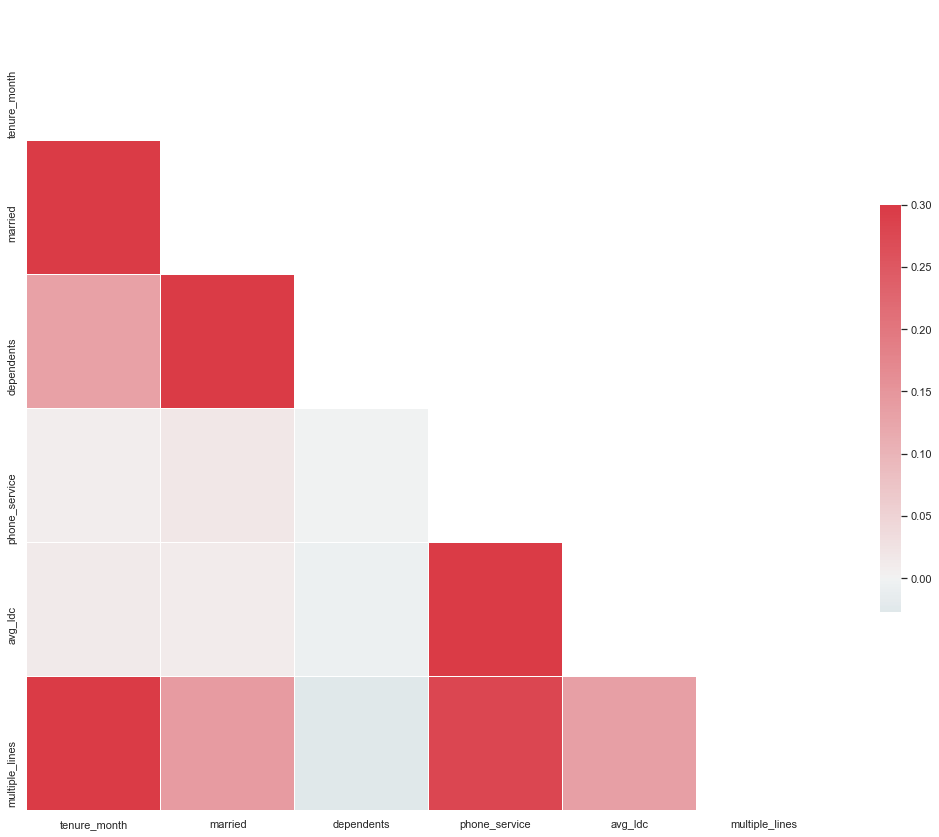

In [14]:
#Set and compute the Correlation Matrix:
sn.set(style="white")
corr = dataset2.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [15]:
#Incase if user_id is an object:
    
identity = dataset["customer_id"]
dataset = dataset.drop(columns="customer_id")
#Convert rest of categorical variable into dummy:
dataset= pd.get_dummies(dataset)
#Rejoin userid to dataset:
dataset = pd.concat([dataset, identity], axis = 1)

In [16]:
#Identify response variable:
    
response = dataset["churn_label"]
dataset = dataset.drop(columns="churn_label")

In [22]:
X_train, X_test, y_train, y_test = train_test_split(dataset, response,stratify=response, test_size = 0.2, #use 0.9 if data is huge.random_state = 0)
#to resolve any class imbalance - use stratify parameter.
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

SyntaxError: invalid syntax (<ipython-input-22-3f2fc53c0f8e>, line 4)

In [21]:
sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2
X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

NameError: name 'X_train' is not defined